In [979]:
%load_ext nb_black 

import random
import math
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import sklearn.datasets as dt

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [980]:
#X, Y = dt.make_moons(100, noise=0.1)
#inputs = X
#targets = []
#for elem in Y:
#  if elem != 0:
#    targets.append(elem)
#  else:
#    targets.append(-1)

#classC = []
#for i in range(len(X)):
#  classC.append([X[i][0], X[i][1], 1 if Y[i] == 1 else -1])
#classA = [[a[0], a[1]] for a in classC if (a)[2] == 1]
#classB = [[a[0], a[1]] for a in classC if (a)[2] == -1]

classA = np.concatenate((np.random.randn(10,2) * 0.2 + [1.5, 0.5], np.random.randn(10,2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20,2) * 0.2 + [0.0, -1]



#classA = np.concatenate((np.random.randn(10,2) * 0.2 + [1.5, 0.5], np.random.randn(10,2) * 0.2 + [-1.5, 0.5]))
#classB = np.random.randn(20,2) * 0.2 + [0.0, -1.0]

#classA = np.concatenate((
  #  np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
   # np.random.randn(10, 2) * 0.2 + [-1.5, 0.5],
    #np.random.randn(10, 2) * 0.2 + [0.0, -1.0],
    #))
#classB=np.random.randn(10, 2) * 0.1 + [0.0, -0.5]

inputs = np.concatenate((classA, classB))
targets = np.concatenate((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))


N = inputs.shape[0]
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute,:]
targets = targets[permute]

<IPython.core.display.Javascript object>

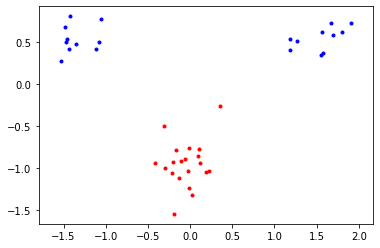

<IPython.core.display.Javascript object>

In [981]:
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

plt.axis('equal')
plt.show()

In [982]:

def linearKernel(a,b):
    return np.dot(a,b)

deg = 3
def polynomialKernel(a,b):
    return pow((np.dot(np.transpose(a), b)+1),deg)
    
sigma = 1
def rbfKernel(a,b):
    nom = pow(np.linalg.norm(a-b),2)
    denom = 2*pow(sigma,2)
    return math.exp(-nom/denom)

kernel = linearKernel

<IPython.core.display.Javascript object>

In [983]:
def getP(t, x):
    p = np.zeros(shape=(len(t), len(t)))
    for i in range(len(t)):
        for j in range(len(t)):
            p[i,j] = t[i]*t[j]*kernel(x[i], x[j])
    return p

P = getP(targets,inputs)

<IPython.core.display.Javascript object>

In [984]:
def objective(alpha):
    res = 0.0
    for i in range(len(alpha)):
        for j in range(len(alpha)):
            res += alpha[i]*alpha[j]*P[i,j]

    return 0.5 * res - np.sum(alpha)
    
    


<IPython.core.display.Javascript object>

In [985]:
def zerofun(alpha):
    return np.dot(alpha,targets)

<IPython.core.display.Javascript object>

In [986]:
#nonZeroAlpha = []
#nonZeroAlpha = [[alpha[i], inputs[i],targets[i]] for i in range(len(alpha)) if alpha[i] > pow(10,-5)]
#for i in range(len(alpha)):
#    if alpha[i] > pow(10,-5):
#        nonZeroAlpha.append([alpha[i], inputs[i],targets[i]])

<IPython.core.display.Javascript object>

In [987]:
def getB(nonZeroAlpha):
    b = 0
    for i in range(len(nonZeroAlpha)):
        b += nonZeroAlpha[i][0]*nonZeroAlpha[i][2]* kernel(nonZeroAlpha[0][1],nonZeroAlpha[i][1]) 
    return b - nonZeroAlpha[0][2]


<IPython.core.display.Javascript object>

In [988]:
def indicator(s):
    res = 0
    for i in range(len(nonZeroAlpha)):
        res += nonZeroAlpha[i][0]*nonZeroAlpha[i][2]*kernel(s,nonZeroAlpha[i][1])
    return res - b

<IPython.core.display.Javascript object>

In [989]:
XC = {'type':'eq', 'fun' : zerofun}
#N = 
C = 100 #change?
bounds = [(0, C) for b in range(N)]
start = np.zeros(N)
ret = minimize(objective, start, bounds=bounds, constraints=XC)
print('Exit message: ', ret['message'])
if not ret['success']:
    raise Exception("No optimal solution found")
    print('no optimal solution found')
    alpha = ret['x']
    #nonZeroAlpha = [val for val in alpha if val > pow(10,-5)]
    nonZeroAlpha = [[alpha[i], inputs[i],targets[i]] for i in range(len(alpha)) if alpha[i] > pow(10,-5)]
    success = False
else:
    success = True
    alpha = ret['x']
    #nonZeroAlpha = [val for val in alpha if val > pow(10,-5)]
    nonZeroAlpha = [[alpha[i], inputs[i],targets[i]] for i in range(len(alpha)) if alpha[i] > pow(10,-5)]

    #print(nonZeroAlpha)
b = getB(nonZeroAlpha)

Exit message:  Optimization terminated successfully


<IPython.core.display.Javascript object>

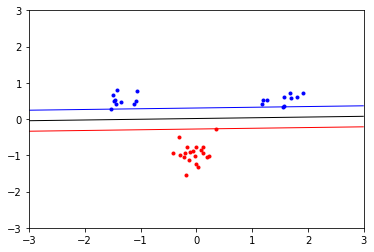

solution found


<IPython.core.display.Javascript object>

In [990]:

xgrid=np.linspace(-3,3)
ygrid=np.linspace(-3,3)
grid=np.array([[indicator([x,y]) 
for x in xgrid]
for y in ygrid])

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

plt.contour(xgrid,ygrid,grid, (-1.0, 0.0, 1.0), colors=('red','black','blue'), linewidths=(1,1,1))

plt.show()
if success:
    print('solution found')
else:
    print('no solution found')

# 7 Exploring and Reporting

## 7.1

### Linear kernel

Linear kernel requires that the two classes can be separated by a line. When this is not the case, minimize will not find an optimal solution.

**Succesful solution, 0.1 STD**

![image](Outputs/linear/svmsucces2.png 'Sucessful')


**Succesful solution, 0.2 STD**

![image](Outputs/linear/linearsucces02.png 'Sucessful')

**Failed due to iteration limit reached**

![image](Outputs/linear/linearfail02.png 'Sucessful')

## 7.2

### Polynomial Kernel

**Succesful solution, degree 2**

![image](Outputs/pol/sucdeg2v2.png 'Sucessful')


**Succesful solution, degree 3**

![image](Outputs/pol/sucdeg3.png 'Sucessful')

### RBF Kernel


**Succesful solution, sigma = 0.1**

![image](Outputs/rbf/suc01.png 'Sucessful')

**Succesful solution, sigma = 0.5**

![image](Outputs/rbf/suc05.png 'Sucessful')

**Succesful solution, sigma = 1**

![image](Outputs/rbf/suc1.png 'Sucessful')

## 7.3

### Polynomial Kernel

A higher degree will enable the decision boundry to be fitted to more complex functions. High P can lead to overfitting, more complex boundry leads to more variance and less bias.

Low p will lead to a more smooth boundry, this will lead to underfitting, low variance and high bias.

### RBF

Small sigma will lead to overfitting (high variance, low bias)

Large sigma will lead to underfitting (low variance, high bias)

## 7.4


C = 0.1

![image](Outputs/slack/01.png 'Sucessful')

C = 1

![image](Outputs/slack/1.png 'Sucessful')

C = 5

![image](Outputs/slack/5.png 'Sucessful')


Small C leads to wider marigins and more missclassifications.

Large C leads to a thinner marigin and less missclassification. 




## 7.5

When data has a lot of noice and little complexity, more slack and less complex kernel is preferable since this prevents overfitting.

When data has little noice and high complexity, a more komplex kernel and less slack is preferable to prevent underfitting.



